# 0.) Import and Clean data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
df = pd.read_csv('bank-additional-full.csv',sep = ";")

In [5]:
df = df.drop(["default", "pdays","previous","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"], axis = 1)

In [6]:
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)

In [7]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

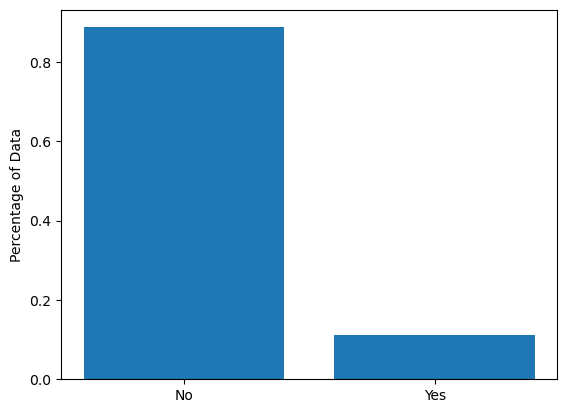

In [8]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [9]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [10]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

In [11]:
X_scaled = smote_X
y_train = smote_y
X_scaled
y_train

,yes
0,False
1,False
2,False
3,False
4,False
...,...
51155,True
51156,True
51157,True
51158,True


In [12]:
len(X_scaled)
len(y_train)

51160

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [13]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= 249.5\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'contact_telephone <= 0.5\ngini = 0.377\nsamples = 24122\nvalue = [18034, 6088]\nclass = No'),
 Text(0.125, 0.375, 'duration <= 134.5\ngini = 0.454\nsamples = 17042\nvalue = [11100, 5942]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.283\nsamples = 7754\nvalue = [6429, 1325]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 9288\nvalue = [4671, 4617]\nclass = No'),
 Text(0.375, 0.375, 'month_oct <= 0.5\ngini = 0.04\nsamples = 7080\nvalue = [6934, 146]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.033\nsamples = 6999\nvalue = [6881, 118]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.452\nsamples = 81\nvalue = [53, 28]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 0.5\ngini = 0.402\nsamples = 27038\nvalue = [7546, 19492]\nclass = Yes'),
 Text(0.625, 0.375, 'month_jul <= 0.5\ngini = 0.318\nsamples = 22834\nvalue = [4520, 18314]\nclass = Yes'),
 Tex

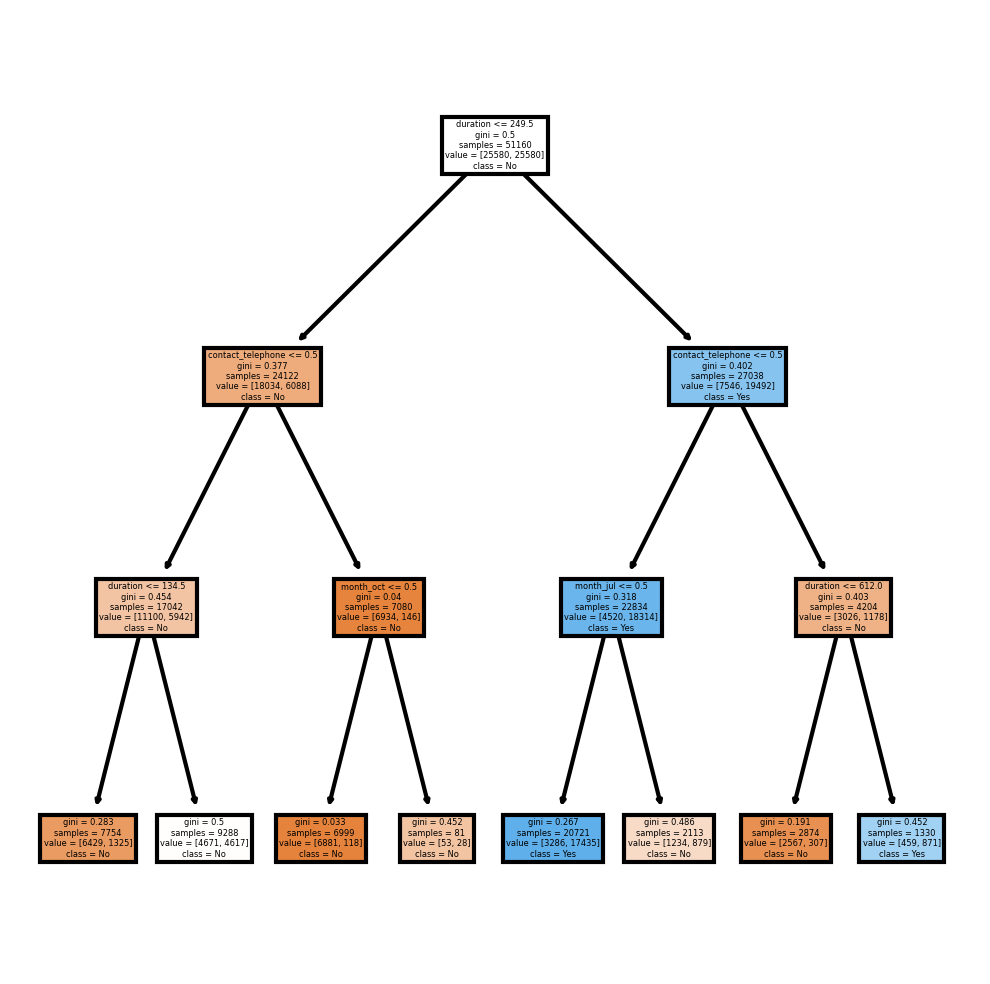

In [14]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
feature_names_list = list(X.columns)
plot_tree(dtree_main, filled = True, feature_names = feature_names_list, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [15]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

D:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


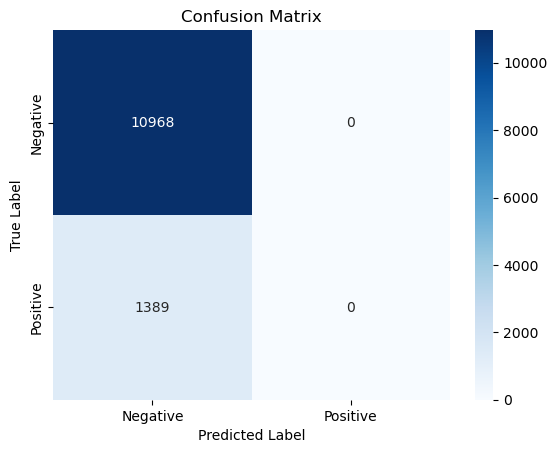

In [16]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [17]:
dtree = DecisionTreeClassifier(max_depth = 3)

In [18]:
bagging = BaggingClassifier(estimator = dtree, n_estimators = 100, max_samples = .5, max_features = 1.)

In [19]:
bagging.fit(X_scaled, y_train)
y_pred = bagging.predict(X_test)

D:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


In [20]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

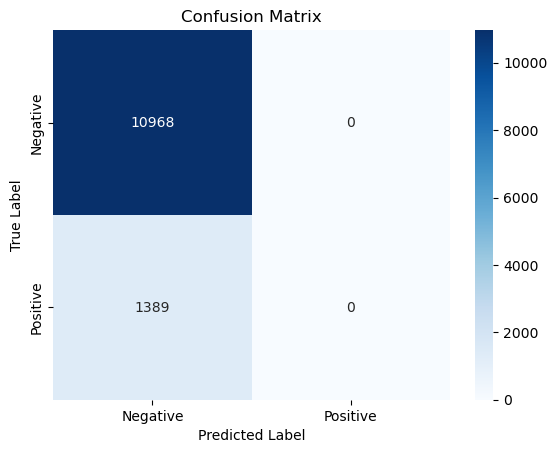

In [21]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [22]:
from sklearn.ensemble import AdaBoostClassifier

In [23]:
dtree = DecisionTreeClassifier(max_depth = 3)

In [24]:
boost = AdaBoostClassifier(estimator = dtree, n_estimators = 100,learning_rate = .1)

In [25]:
boost.fit(X_scaled, y_train)
y_pred = bagging.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

D:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


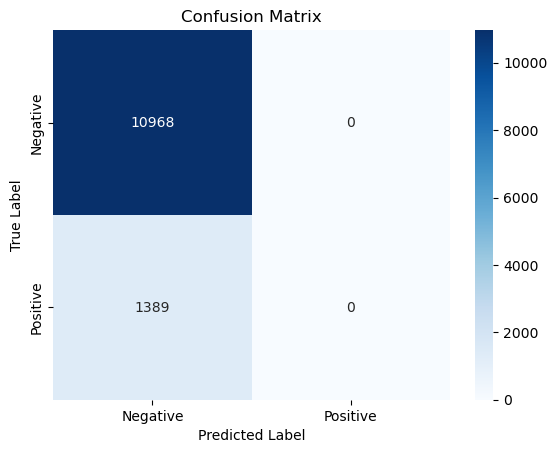

In [26]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [27]:
from sklearn.linear_model import LogisticRegression

In [33]:
base_predictions = [list(dtree_main.predict(X_scaled)),list(boost.predict(X_scaled)),list(bagging.predict(X_scaled))]

In [34]:
n = len(base_predictions[0])

In [35]:
base_predictions = [np.array(base_predictions)[:,i] for i in range(n)]

In [36]:
super_learner = LogisticRegression()

In [37]:
super_learner.fit(base_predictions, y_train)

D:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [38]:
super_learner.coef_

array([[0.44011169, 4.64131066, 0.67680216]])

Based on the results, it seems like the Decision Tree is exactly the best.

And it weights 0.44 $\times$ $\hat{y}_{Decision Tree}$ + 4.64 $\times$ $\hat{y}_{Boosted Tree}$ + 0.67 $\times$ $\hat{y}_{Bagged Tree}$.